In [1]:
# Import dependencies
import numpy as np
import pandas as pd

In [2]:
# Import train and test data (already uploaded into same dir as notebook)
train = pd.read_csv('DailyDelhiClimateTrain.csv')
test = pd.read_csv('DailyDelhiClimateTest.csv')

In [3]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
# Create lag features for 1, 2, 3, 7, 14, 28 days (for time-series forecasting)
# temperature
train['lag_1_temp'] = train['meantemp'].shift(1)
train['lag_2_temp'] = train['meantemp'].shift(2)
train['lag_3_temp'] = train['meantemp'].shift(3)
train['lag_7_temp'] = train['meantemp'].shift(7)
train['lag_14_temp'] = train['meantemp'].shift(14)
train['lag_28_temp'] = train['meantemp'].shift(28)
# humidity
train['lag_1_humidity'] = train['humidity'].shift(1)
train['lag_2_humidity'] = train['humidity'].shift(2)
train['lag_3_humidity'] = train['humidity'].shift(3)
train['lag_7_humidity'] = train['humidity'].shift(7)
train['lag_14_humidity'] = train['humidity'].shift(14)
train['lag_28_humidity'] = train['humidity'].shift(28)
# wind_speed
train['lag_1_wind_speed'] = train['wind_speed'].shift(1)
train['lag_2_wind_speed'] = train['wind_speed'].shift(2)
train['lag_3_wind_speed'] = train['wind_speed'].shift(3)
train['lag_7_wind_speed'] = train['wind_speed'].shift(7)
train['lag_14_wind_speed'] = train['wind_speed'].shift(14)
train['lag_28_wind_speed'] = train['wind_speed'].shift(28)
# pressure
train['lag_1_pressure'] = train['meanpressure'].shift(1)
train['lag_2_pressure'] = train['meanpressure'].shift(2)
train['lag_3_pressure'] = train['meanpressure'].shift(3)
train['lag_7_pressure'] = train['meanpressure'].shift(7)
train['lag_14_pressure'] = train['meanpressure'].shift(14)
train['lag_28_pressure'] = train['meanpressure'].shift(28)

In [6]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure,lag_1_temp,lag_2_temp,lag_3_temp,lag_7_temp,lag_14_temp,...,lag_3_wind_speed,lag_7_wind_speed,lag_14_wind_speed,lag_28_wind_speed,lag_1_pressure,lag_2_pressure,lag_3_pressure,lag_7_pressure,lag_14_pressure,lag_28_pressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1015.666667,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1017.800000,1015.666667,NaN,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.0,NaN,NaN,...,0.00,NaN,NaN,NaN,1018.666667,1017.800000,1015.666667,NaN,NaN,NaN
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.4,NaN,NaN,...,2.98,NaN,NaN,NaN,1017.166667,1018.666667,1017.800000,NaN,NaN,NaN


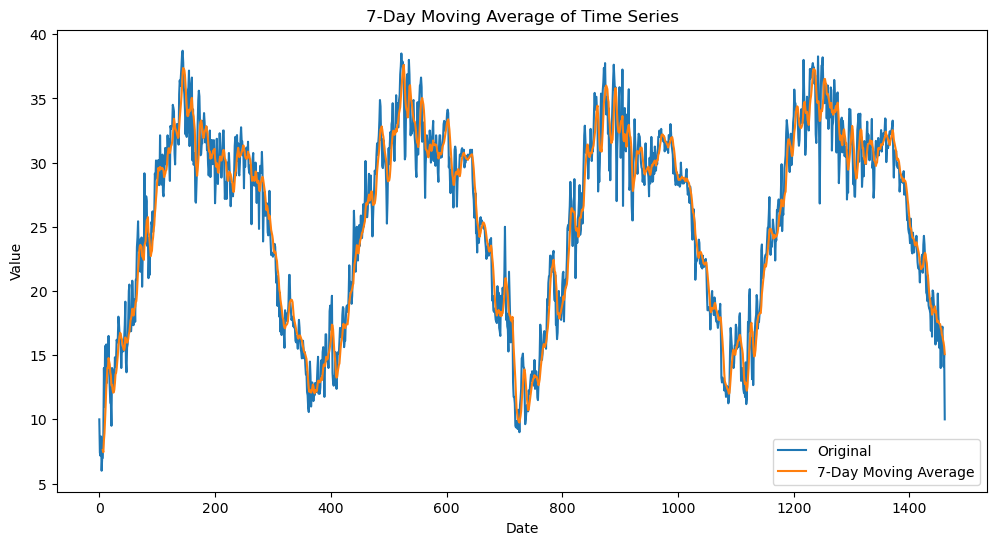

In [7]:
# check moving average for EDA
import matplotlib.pyplot as plt

train_copy = train.copy()
train_copy['7_day_MA'] = train_copy['meantemp'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(train_copy['meantemp'], label='Original')
plt.plot(train_copy['7_day_MA'], label='7-Day Moving Average')
plt.title('7-Day Moving Average of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [8]:
# drop n/a values
train = train.dropna()

In [9]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure,lag_1_temp,lag_2_temp,lag_3_temp,lag_7_temp,lag_14_temp,...,lag_3_wind_speed,lag_7_wind_speed,lag_14_wind_speed,lag_28_wind_speed,lag_1_pressure,lag_2_pressure,lag_3_pressure,lag_7_pressure,lag_14_pressure,lag_28_pressure
28,2013-01-29,14.125000,65.500000,3.237500,1016.625000,14.833333,12.857143,12.666667,9.500000,14.714286,...,6.800000,3.083333,0.528571,0.000000,1017.833333,1018.142857,1019.666667,1021.800000,1015.857143,1015.666667
29,2013-01-30,14.714286,70.428571,1.057143,1017.857143,14.125000,14.833333,12.857143,14.000000,13.833333,...,5.557143,4.016667,0.000000,2.980000,1016.625000,1017.833333,1018.142857,1020.500000,1016.666667,1017.800000
30,2013-01-31,16.200000,65.600000,2.960000,1018.400000,14.714286,14.125000,14.833333,13.833333,16.500000,...,3.700000,6.166667,5.250000,4.633333,1017.857143,1016.625000,1017.833333,1020.500000,1015.833333,1018.666667
31,2013-02-01,16.000000,73.000000,2.220000,1016.000000,16.200000,14.714286,14.125000,12.250000,13.833333,...,3.237500,5.550000,8.950000,1.233333,1018.400000,1017.857143,1016.625000,1020.750000,1014.500000,1017.166667
32,2013-02-02,16.285714,77.571429,1.328571,1017.142857,16.000000,16.200000,14.714286,12.666667,12.500000,...,1.057143,6.800000,5.883333,3.700000,1016.000000,1018.400000,1017.857143,1019.666667,1021.666667,1016.500000


In [10]:
train = train.drop(columns = 'date')

In [13]:
# compile features and label
colnames = ['lag_1_temp', 'lag_2_temp', 'lag_3_temp', 'lag_7_temp', 'lag_14_temp', 'lag_28_temp', 
           'lag_1_humidity', 'lag_2_humidity', 'lag_3_humidity', 'lag_7_humidity', 'lag_14_humidity', 'lag_28_humidity', 
           'lag_1_wind_speed', 'lag_2_wind_speed', 'lag_3_wind_speed', 'lag_7_wind_speed', 'lag_14_wind_speed', 'lag_28_wind_speed',
           'lag_1_pressure', 'lag_2_pressure', 'lag_3_pressure', 'lag_7_pressure', 'lag_14_pressure', 'lag_28_pressure']
X = train[colnames]
y = train['meantemp']

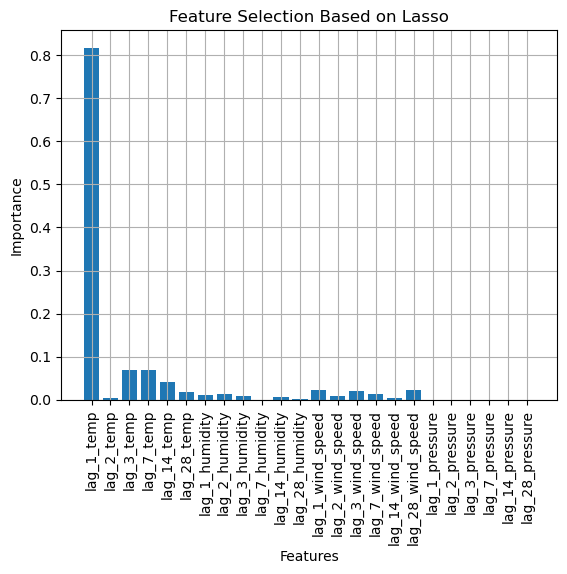

In [15]:
# Select best lags (features) with Lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=0.00001)
lasso.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso_coef = np.abs(lasso.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(colnames, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [17]:
# compile features and label (w/o wind speed)
colnames_2 = ['lag_1_temp', 'lag_2_temp', 'lag_3_temp', 'lag_7_temp', 'lag_14_temp', 'lag_28_temp', 
           'lag_1_humidity', 'lag_2_humidity', 'lag_3_humidity', 'lag_7_humidity', 'lag_14_humidity', 'lag_28_humidity', 
           'lag_1_pressure', 'lag_2_pressure', 'lag_3_pressure', 'lag_7_pressure', 'lag_14_pressure', 'lag_28_pressure']
X_2 = train[colnames_2]
y_2 = train['meantemp']

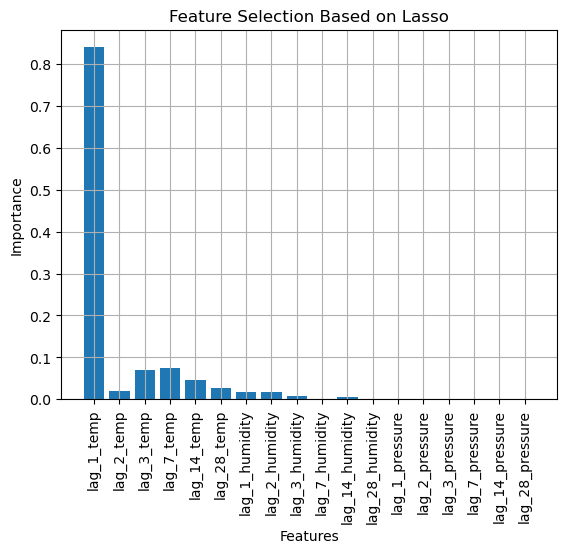

In [18]:
lasso_2 = Lasso(alpha=0.00001)
lasso_2.fit(X_2, y_2)

# Using np.abs() to make coefficients positive.  
lasso2_coef = np.abs(lasso_2.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(colnames_2, lasso2_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

Interestingly, wind speed plays a factor in forecasting temperature, but not atmospheric pressure. Temperature seems to be the most important factor.

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# train regression model based on selected features
lasso_features = ['lag_1_temp', 'lag_7_temp', 'lag_3_temp', 'lag_14_temp', 'lag_28_temp']
X = train[lasso_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(random_state=42)  
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
# compute accuracy metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

RMSE: 1.722227802722591
Mean Absolute Error (MAE): 1.3673040217104726


In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 5.865926172383598%


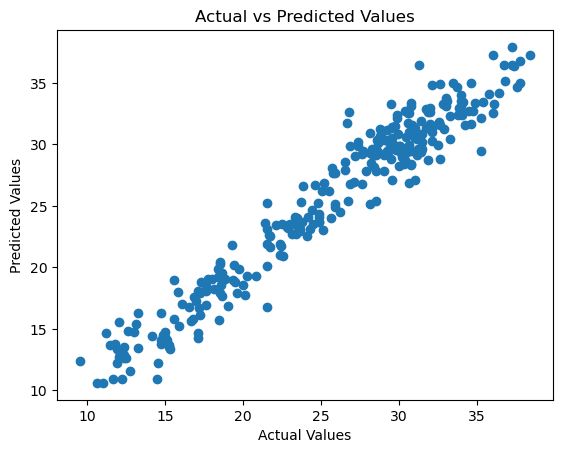

In [23]:
# visualization of actual vs predicted values by model
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [24]:
# SARIMAX = ARIMA plus exogenous features
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

# set the date column as index
df.set_index('date', inplace=True)

# Define the time series to forecast
time_series = df['meantemp']
time_series.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

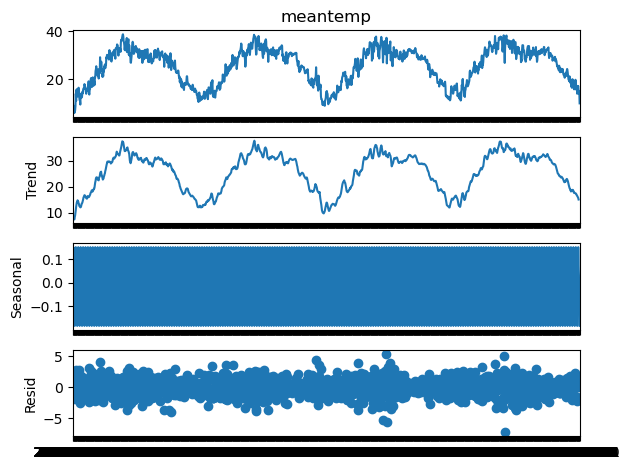

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (break into multiple components)
# 'additive' means component effects are additive
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Assuming weekly seasonality

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

In [27]:
# prepare SARIMAX model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

results = model.fit()

print(results)

/Users/jimmyzhang10/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/jimmyzhang10/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01507D+00    |proj g|=  1.78161D-01

At iterate    5    f=  1.91176D+00    |proj g|=  2.70618D-02

At iterate   10    f=  1.89832D+00    |proj g|=  7.65026D-03

At iterate   15    f=  1.89736D+00    |proj g|=  2.59701D-03

At iterate   20    f=  1.89734D+00    |proj g|=  9.21805D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   9.218D-06   1.897D+00
  F =   1.8973353235630233     

CONVERG

In [28]:
# make a forecast
forecast = results.get_forecast(steps=12)  # Forecasting the next 12 periods
print(forecast.predicted_mean)

2017-01-02    11.364509
2017-01-03    12.134752
2017-01-04    12.510491
2017-01-05    13.043835
2017-01-06    13.027281
2017-01-07    13.360158
2017-01-08    13.247585
2017-01-09    13.110731
2017-01-10    13.124431
2017-01-11    12.851029
2017-01-12    12.979396
2017-01-13    12.677348
Freq: D, Name: predicted_mean, dtype: float64
